In [2]:
import cmocean.cm as cm
#import h5py
import matplotlib as mpl
import matplotlib.colorbar as colorbar
import matplotlib.colors as mplcolours
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline

In [3]:
mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')

In [4]:
oil0d = pd.read_csv('./MassBalance_near-BP_13th-100-14.sro', sep='\s+', skiprows=4)
oil0d = oil0d.drop([0], axis=0)
length =len(oil0d)
oil0d = oil0d.drop([length-3, length-2, length-1, length], axis=0)

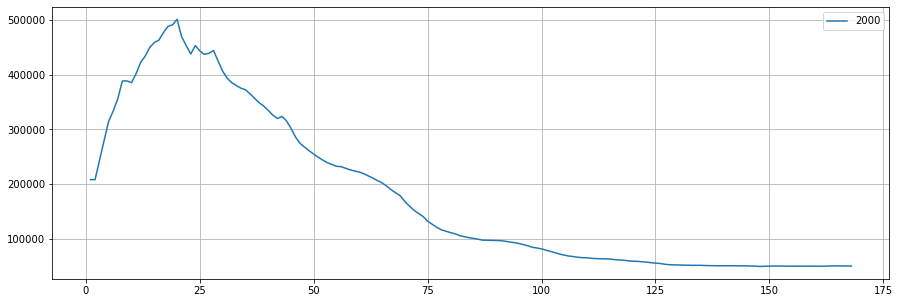

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
oil0d.Area.plot(ax=ax, label="2000");
plt.grid();
plt.legend();

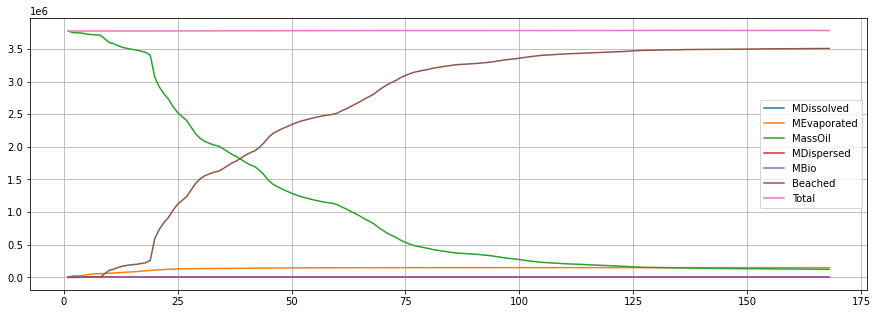

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
oil0d.MDissolved.plot();
oil0d.MEvaporated.plot();
oil0d.MassOil.plot();
oil0d.MDispersed.plot();
oil0d.MBio.plot()
massbeached2 = (oil0d.VolOilBeached*oil0d.Density/(1-oil0d.VWaterContent)
    *(1-oil0d.MWaterContent))

massbeached2.plot(label="Beached")

plt.plot(oil0d.MDissolved + oil0d.MEvaporated + oil0d.MassOil 
         + massbeached2 + oil0d.MDispersed + oil0d.MBio, label="Total");

plt.legend();
plt.grid();

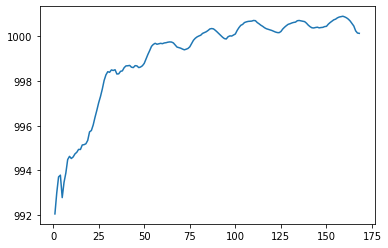

In [9]:
(oil0d.Density/(1-oil0d.VWaterContent)
    *(1-oil0d.MWaterContent)).plot();

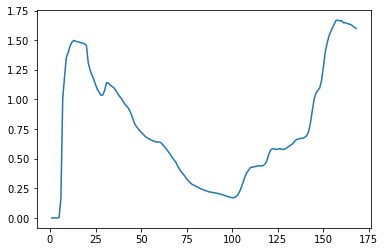

In [10]:
oil0d.MDispersed.plot();

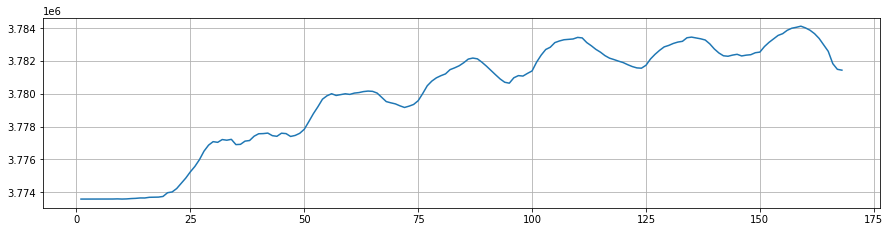

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3.5))
ax.plot(oil0d.MDissolved + oil0d.MEvaporated + oil0d.MassOil 
         + massbeached2 + oil0d.MDispersed + oil0d.MBio);
ax.grid();

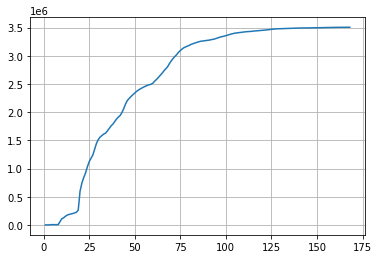

In [12]:
massbeached2.plot(label="Beached");
plt.grid()

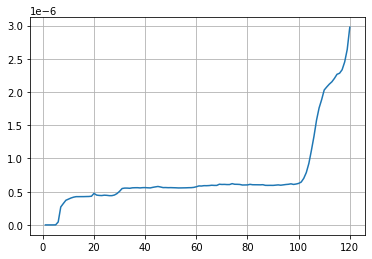

In [13]:
(oil0d.MDispersed/(oil0d.MDispersed + oil0d.MassOil))[:120].plot()
plt.grid()

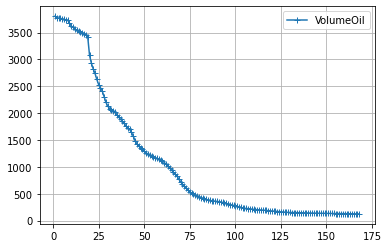

In [14]:
oil0d.VolumeOil.plot(style='+-');
plt.legend();
plt.grid();

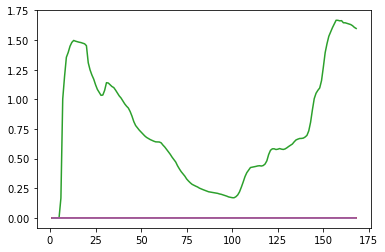

In [15]:
oil0d.AnalyteMass1.plot()
oil0d.AnalyteMass2.plot()
oil0d.AnalyteMass3.plot()
oil0d.AnalyteMass4.plot()
oil0d.AnalyteMass5.plot();


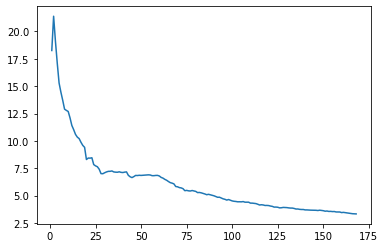

In [16]:
oil0d.Thickness.plot();

In [17]:
oilLag = xr.open_dataset('./Lagrangian_bunker-14_near-BP_13th-100-14.nc')

In [20]:
imin, imax = 280, 430
jmin, jmax = 200, 330

<xarray.DataArray 'OilWaterColumnOilVol_3D' ()>
array(2928.2758)
Coordinates:
    time     datetime64[ns] 2018-06-17T20:30:00


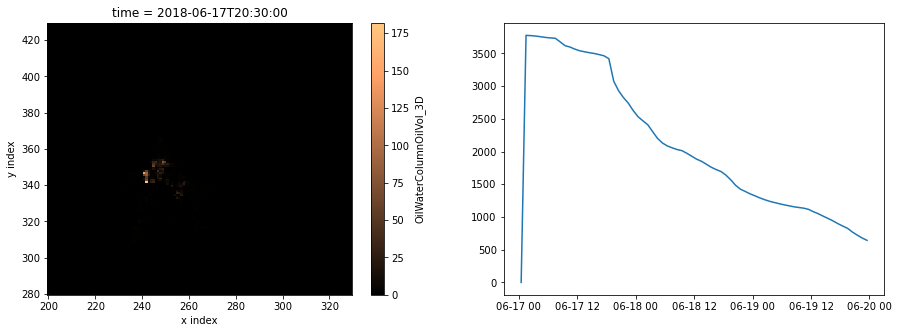

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
it = 20

field = oilLag.OilWaterColumnOilVol_3D[it]
(field[:, imin:imax , jmin:jmax].sum(axis=0)).plot(ax=axs[0], cmap='copper')
print (oilLag.OilWaterColumnOilVol_3D[it, :, imin:imax, jmin:jmax].sum(axis=0).sum(axis=0).sum(axis=0))

axs[1].plot(oilLag.time[0:72], oilLag.OilWaterColumnOilVol_3D[0:72].sum(axis=1).sum(axis=1).sum(axis=1)
           )

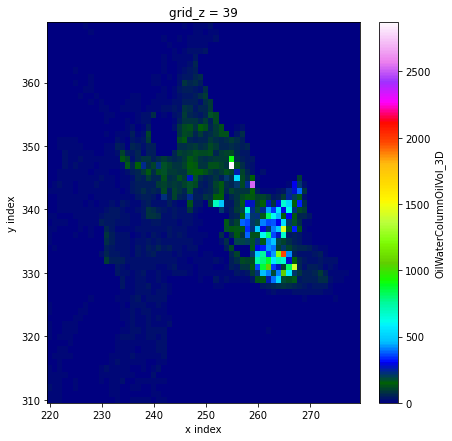

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
imin, imax = 310, 370
jmin, jmax = 220, 280
oilLag.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=ax, cmap='gist_ncar');

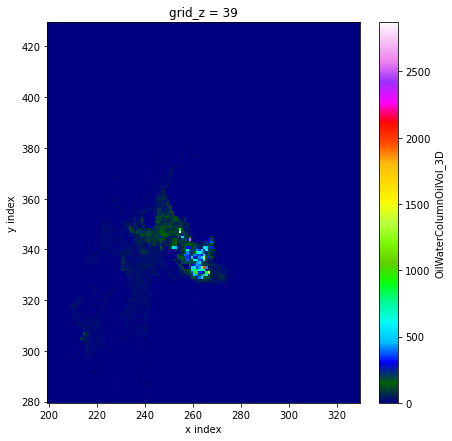

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
imin, imax = 280, 430
jmin, jmax = 200, 330
oilLag.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=ax, cmap='gist_ncar');

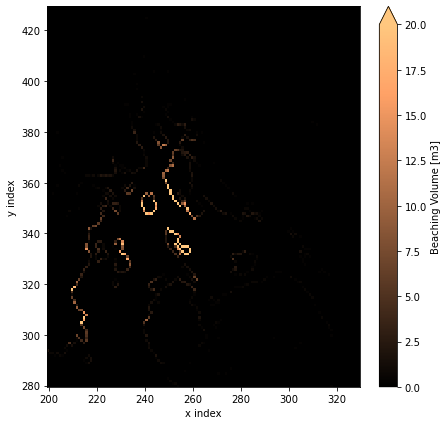

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
oilLag.Beaching_Volume[imin:imax , jmin:jmax].plot(ax=ax, cmap='copper', vmax=20);

In [46]:
VolumeOil_3D = oilLag.OilWaterColumnOilVol_3D[0:72].sum(axis=1).sum(axis=1).sum(axis=1)

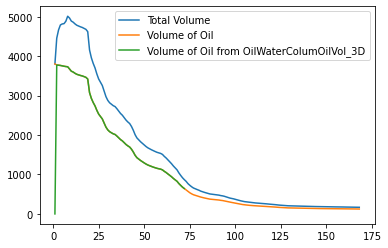

In [48]:
oil0d.Volume.plot(label='Total Volume')
oil0d.VolumeOil.plot(label='Volume of Oil');
plt.plot(np.arange(1, 73), VolumeOil_3D, label="Volume of Oil from OilWaterColumOilVol_3D")
plt.legend();